In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#!pip install xgboost
import xgboost
from dateutil.relativedelta import relativedelta
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

root_path = 'gdrive/MyDrive/Colab Notebooks/'
path = Path(root_path)
filename = 'av.csv'

df_final = pd.read_csv(path/filename)
df_final


,date,PM10,NO,NO2,WS,CO,Benzene,NOx,Ozone,SO2,NH3,Toluene,PM25
0,01-01-2019 00:00,752.78,179.68,111.66,0.3,3.52,20.45,251.7,22.86,10.79,93.35,58.33,492.03
1,01-01-2019 08:00,408.19,135.13,148.64,0.53,4.57,9.75,189.21,22.68,13.86,104.4,31.63,266.16
2,01-01-2019 16:00,475.85,123.27,177.02,0.31,5.66,17.79,176.38,26.04,21.74,89.24,89.25,382.5
3,02-01-2019 00:00,771.27,357.61,106.05,0.3,5.96,20.9,350.56,61.84,5.99,109.64,99.34,545.28
4,02-01-2019 08:00,495.06,75.6,125.28,1.13,1.56,10.11,128.26,34.37,19.54,108.53,57.46,344.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,08-12-2020 16:00,426.88,263.38,117.48,0.3,4.29,7.38,288.26,16.23,37.45,58.13,152.52,233.56
2124,09-12-2020 00:00,407.25,341.16,75.62,0.3,4.75,None,328.39,15.88,16.91,58.52,220.12,330.22
2125,09-12-2020 08:00,353.31,56.12,87.8,0.31,2.48,8.67,92.4,26.99,23.87,36.83,61.83,301.69
2126,09-12-2020 16:00,314.28,118.58,48.84,0.3,3.97,9.99,122.65,14,None,21.07,83.18,182.78


In [3]:
df_final = df_final.mask(df_final.eq('None')).dropna()

df_final.drop('date', inplace=True, axis=1)
df_final['PM10'] = df_final['PM10'].astype(float)
df_final['NO'] = df_final['NO'].astype(float)
df_final['NO2'] = df_final['NO2'].astype(float)
df_final['WS'] = df_final['WS'].astype(float)
df_final['CO'] = df_final['CO'].astype(float)
df_final['Benzene'] = df_final['Benzene'].astype(float)
df_final['NOx'] = df_final['NOx'].astype(float)
df_final['Ozone'] = df_final['Ozone'].astype(float)
df_final['SO2'] = df_final['SO2'].astype(float)
df_final['NH3'] = df_final['NH3'].astype(float)
df_final['Toluene'] = df_final['Toluene'].astype(float)
df_final['PM25'] = df_final['PM25'].astype(float)


#df_final['date'] = pd.to_datetime(df_final['date'])
df_final

,PM10,NO,NO2,WS,CO,Benzene,NOx,Ozone,SO2,NH3,Toluene,PM25
0,752.78,179.68,111.66,0.30,3.52,20.45,251.70,22.86,10.79,93.35,58.33,492.03
1,408.19,135.13,148.64,0.53,4.57,9.75,189.21,22.68,13.86,104.40,31.63,266.16
2,475.85,123.27,177.02,0.31,5.66,17.79,176.38,26.04,21.74,89.24,89.25,382.50
3,771.27,357.61,106.05,0.30,5.96,20.90,350.56,61.84,5.99,109.64,99.34,545.28
4,495.06,75.60,125.28,1.13,1.56,10.11,128.26,34.37,19.54,108.53,57.46,344.22
...,...,...,...,...,...,...,...,...,...,...,...,...
2120,437.81,299.69,121.05,0.30,6.01,8.22,313.63,15.17,22.77,54.00,99.99,279.81
2121,384.05,390.43,66.77,0.30,4.65,10.29,357.51,15.00,12.56,53.33,147.88,342.25
2122,265.54,53.14,122.93,0.31,2.28,6.68,108.73,40.43,19.62,60.17,19.02,235.23
2123,426.88,263.38,117.48,0.30,4.29,7.38,288.26,16.23,37.45,58.13,152.52,233.56


In [4]:
print(df_final.dtypes)

PM10       float64
NO         float64
NO2        float64
WS         float64
CO         float64
Benzene    float64
NOx        float64
Ozone      float64
SO2        float64
NH3        float64
Toluene    float64
PM25       float64
dtype: object


In [5]:
df_final.columns
#df_final['date'].max() 
#df_final.date.min()

Index(['PM10', 'NO', 'NO2', 'WS', 'CO', 'Benzene', 'NOx', 'Ozone', 'SO2',
       'NH3', 'Toluene', 'PM25'],
      dtype='object')

In [6]:
features = ['PM10', 'NO', 'NO2', 'WS', 'CO', 'Benzene', 'NOx', 'Ozone','SO2', 'NH3', 'Toluene', 'PM25']

In [23]:
from sklearn.model_selection import train_test_split
X, y = df_final.iloc[:,:-1],df_final.iloc[:,-1]
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.35, shuffle=False )
#random_state=123

In [60]:
#model = xgboost.XGBRegressor(objective='reg:linear', n_estimators=1000, learning_rate=0.003, max_depth=6, alpha=5, min_child_weight= 1,eta=.3,subsample= 1, colsample_bytree= 1)
model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.006, max_depth=6)

model.fit(trainX,trainy)
pred = model.predict(testX)
MAE= mean_absolute_error(testy, pred)
MSE= mean_squared_error(testy, pred)
RMSE = np.sqrt(mean_squared_error(testy, pred))
print("Mean Absolute Error: %f" % (MAE))
#print("Mean Square Error: %f" % (MSE))
print("Root Mean Square Error: %f" % (RMSE))

Mean Absolute Error: 25.047052
Root Mean Square Error: 42.762411


In [9]:
params = {"objective":"count:poisson",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}
data_dmatrix = xgboost.DMatrix(data=X,label=y)

cv_results = xgboost.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,155.533463,2.309550,155.479792,4.693015
1,155.504766,2.309526,155.451070,4.692984
2,155.473989,2.309506,155.420309,4.692988
3,155.440938,2.309495,155.387278,4.692991
4,155.405619,2.309477,155.351883,4.692957


In [10]:
print((cv_results["test-rmse-mean"]).tail(1))

49    144.05307
Name: test-rmse-mean, dtype: float64


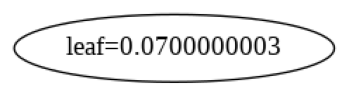

In [11]:
model = xgboost.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt

xgboost.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

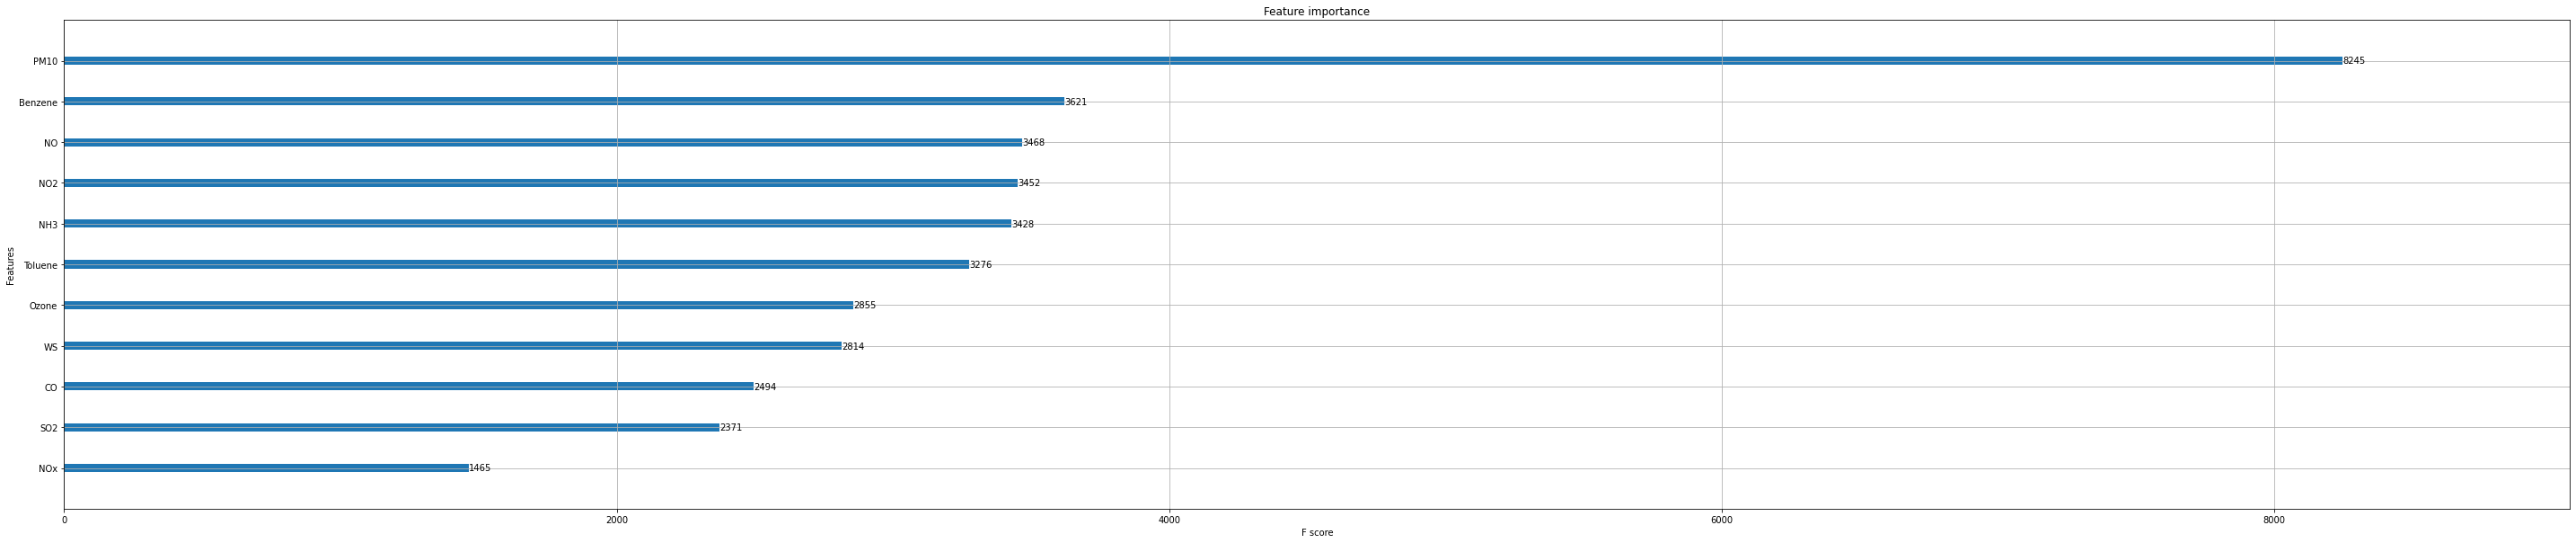

In [61]:
xgboost.plot_importance(model._Booster)
plt.rcParams['figure.figsize'] = [5, 10]
plt.show()

In [62]:
"""from sklearn import preprocessing

result=preprocessing.normalize(df_final, axis=0)
result"""

'from sklearn import preprocessing\n\nresult=preprocessing.normalize(df_final, axis=0)\nresult'